In [ ]:
#download dataset

!wget https://drive.google.com/drive/folders/1vH8aQ8XGOlu9GBBs8NJGSqqriZfzs9Qk?usp=sharing

In [ ]:
!unzip covidData.zip

Archive:  covidData.zip
   creating: covidData/
  inflating: covidData/.DS_Store     
  inflating: __MACOSX/covidData/._.DS_Store  
   creating: covidData/nonCovid/
   creating: covidData/covid/
  inflating: covidData/nonCovid/.DS_Store  
  inflating: __MACOSX/covidData/nonCovid/._.DS_Store  
   creating: covidData/nonCovid/test/
   creating: covidData/nonCovid/train/
  inflating: covidData/covid/.DS_Store  
  inflating: __MACOSX/covidData/covid/._.DS_Store  
   creating: covidData/covid/test/
   creating: covidData/covid/train/
  inflating: covidData/nonCovid/test/NORMAL2-IM-0500-0001.jpeg  
  inflating: __MACOSX/covidData/nonCovid/test/._NORMAL2-IM-0500-0001.jpeg  
  inflating: covidData/nonCovid/test/NORMAL2-IM-0980-0001.jpeg  
  inflating: __MACOSX/covidData/nonCovid/test/._NORMAL2-IM-0980-0001.jpeg  
  inflating: covidData/nonCovid/test/NORMAL2-IM-1019-0001.jpeg  
  inflating: __MACOSX/covidData/nonCovid/test/._NORMAL2-IM-1019-0001.jpeg  
  inflating: covidData/nonCovid/test/NORMA

## Now, after downloading the dataset and unzip it, I'm going to start prossing it.

In [ ]:
#importing the needed packages
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
import tensorflow as tf

Now, I'm going to bulid a sequential CNN model with binary cross entropy loss function.

In [ ]:
# building the model

from keras.backend import conv2d
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics='accuracy')


In [ ]:
# the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
# model training

train_datagenrator = image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)



# Since I collected the data from some github repo and kaggle project and did the data anaylsis, warpping and cleaning using another jupter notebook it caught **.ipynb_checkpoints**.

# Those files are hidden somewhere in the dataset and need to be deleted not to interfare with the data classes (covid : 0 , noncovid: 1 , ipynb_checkpoints: 2)

*That's why I needed to use the following line of code.*

In [ ]:
rmdir /content/covidData/train/.ipynb_checkpoints

In [ ]:

train_genrator = train_datagenrator.flow_from_directory(
    'covidData/train',
    target_size=(224,224),
    batch_size= 32,
    class_mode='binary'
)

Found 276 images belonging to 2 classes.


In [ ]:
train_genrator.class_indices

{'covid': 0, 'nonCovid': 1}

In [ ]:
rmdir /content/covidData/test/.ipynb_checkpoints

In [ ]:
test_genrator = test_dataset.flow_from_directory(
    'covidData/test',
    target_size=(224,224),
    batch_size= 32,
    class_mode='binary'
)

Found 116 images belonging to 2 classes.


In [ ]:
test_genrator.class_indices

{'covid': 0, 'nonCovid': 1}

## Starting the training phase though 10 epochs, where I found that 10 is the optimal number of epochs. 

In [ ]:
hist = model.fit_generator(
    train_genrator,
    steps_per_epoch=8,
    epochs= 10,
    validation_data= test_genrator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 0.2607 - accuracy: 0.9180 - val_loss: 0.1708 - val_accuracy: 0.9688
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.3124 - accuracy: 0.8566 - val_loss: 0.1939 - val_accuracy: 0.9844
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.3543 - accuracy: 0.8525 - val_loss: 0.1410 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.3344 - accuracy: 0.8607 - val_loss: 0.2345 - val_accuracy: 0.9531
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.2796 - accuracy: 0.8893 - val_loss: 0.1640 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.3020 - accuracy: 0.8893 - val_loss: 0.2363 - val_accuracy: 0.9531
Epoch 7/10
8/8 [==============================] - 12s 1s/step - loss: 0.2648 - accuracy: 0.8934 - val_loss: 0.1030 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_genrator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.1470080316066742, 0.9528985619544983]

In [ ]:
model.evaluate_generator(test_genrator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0695251077413559, 0.982758641242981]

## Test Images

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
train_genrator.class_indices

{'covid': 0, 'nonCovid': 1}

In [ ]:
y_train = []
y_test = []

## starting the prediction process and build the data in arrays to use later in the confusion metrics

In [ ]:
for i in os.listdir("./covidData/test/nonCovid/"):
  img = image.load_img("./covidData/test/nonCovid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img) 
  y_test.append(p[0,0])
  y_train.append(1)

In [ ]:
for i in os.listdir("./covidData/test/covid/"):
  img = image.load_img("./covidData/test/covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img) 
  y_test.append(p[0,0])
  y_train.append(0)

In [ ]:

y_train=np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train,y_test)

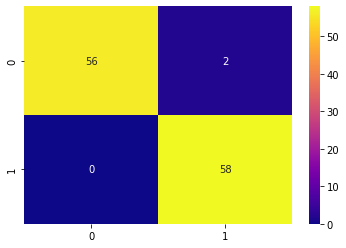

In [ ]:
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)

In [ ]:
Pneumonia Classifcation Using Deep Learning from Chest X‑ray
Images During COVID‑19